In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

In [2]:
# Define the image path
image_path = "/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/data/EyeDentify/Wo_SR/eyes/left_eyes/23/1/frame_01.png"

In [3]:
# Read the image
image = Image.open(image_path).convert('RGB')
image

In [4]:
width, height = image.size
print(f"Width: {width}")
print(f"Height: {height}")

Width: 32
Height: 16


In [5]:
# Function to perform bicubic upsampling
def bicubic_upsampling(img, scale):
    width, height = image.size
    preprocess_steps_rgb = [transforms.ToTensor()]
    preprocess_steps_rgb.append(
        transforms.Resize(
            [height*scale, width*scale],
            interpolation=transforms.InterpolationMode.BICUBIC,
            antialias=True,
        ),
    )
    preprocess_function_rgb = transforms.Compose(preprocess_steps_rgb)
    upsampled_img = preprocess_function_rgb(img)
    upsampled_img_pil = transforms.ToPILImage()(upsampled_img)
    return upsampled_img_pil

In [6]:
# Perform bicubic upsampling x2 and x4
upsampled_x2 = bicubic_upsampling(image, 2)
upsampled_x4 = bicubic_upsampling(image, 4)

In [8]:
# Save the images
upsampled_x2_path = "/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/rough_works/SR_imgs/bicubic_23_x2.png"
upsampled_x4_path = "/home/vshah/Documents/Uni/Thesis_Cluster/pupil-size-estimation-with-super-resolution/rough_works/SR_imgs/bicubic_23_x4.png"

upsampled_x2.save(upsampled_x2_path)
upsampled_x4.save(upsampled_x4_path)

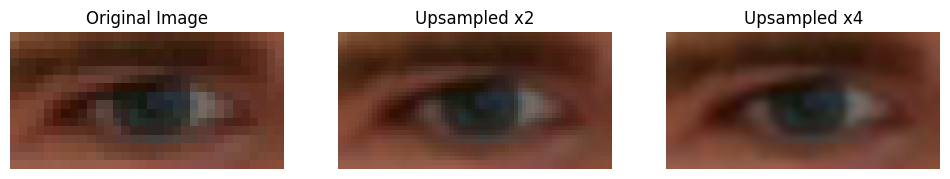

In [7]:
# Plot the original and upsampled images
plt.figure(figsize=(12, 6))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Plot the x2 upsampled image
plt.subplot(1, 3, 2)
plt.imshow(upsampled_x2)
plt.title('Upsampled x2')
plt.axis('off')

# Plot the x4 upsampled image
plt.subplot(1, 3, 3)
plt.imshow(upsampled_x4)
plt.title('Upsampled x4')
plt.axis('off')

plt.show()